In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore")  

In [25]:
table = pd.read_csv("weatherHistory.csv")
print(table.head())

                  Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13  

## 2. Визуализируйте матрицу корреляций в виде тепловой карты.

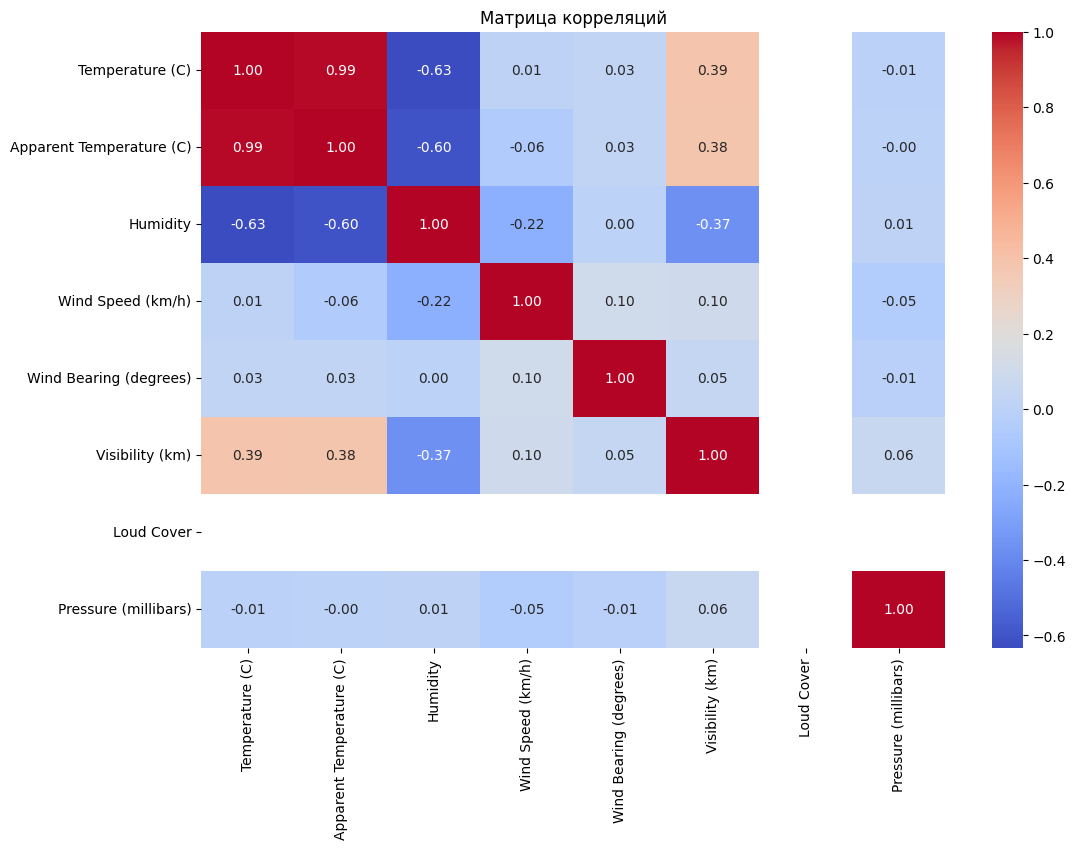

In [26]:
numeric_cols = table.select_dtypes(include=['float64', 'int64']).columns

corr_matrix = table[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляций')
plt.show()

## 3. Постройте матрицу диаграмм рассеяния.

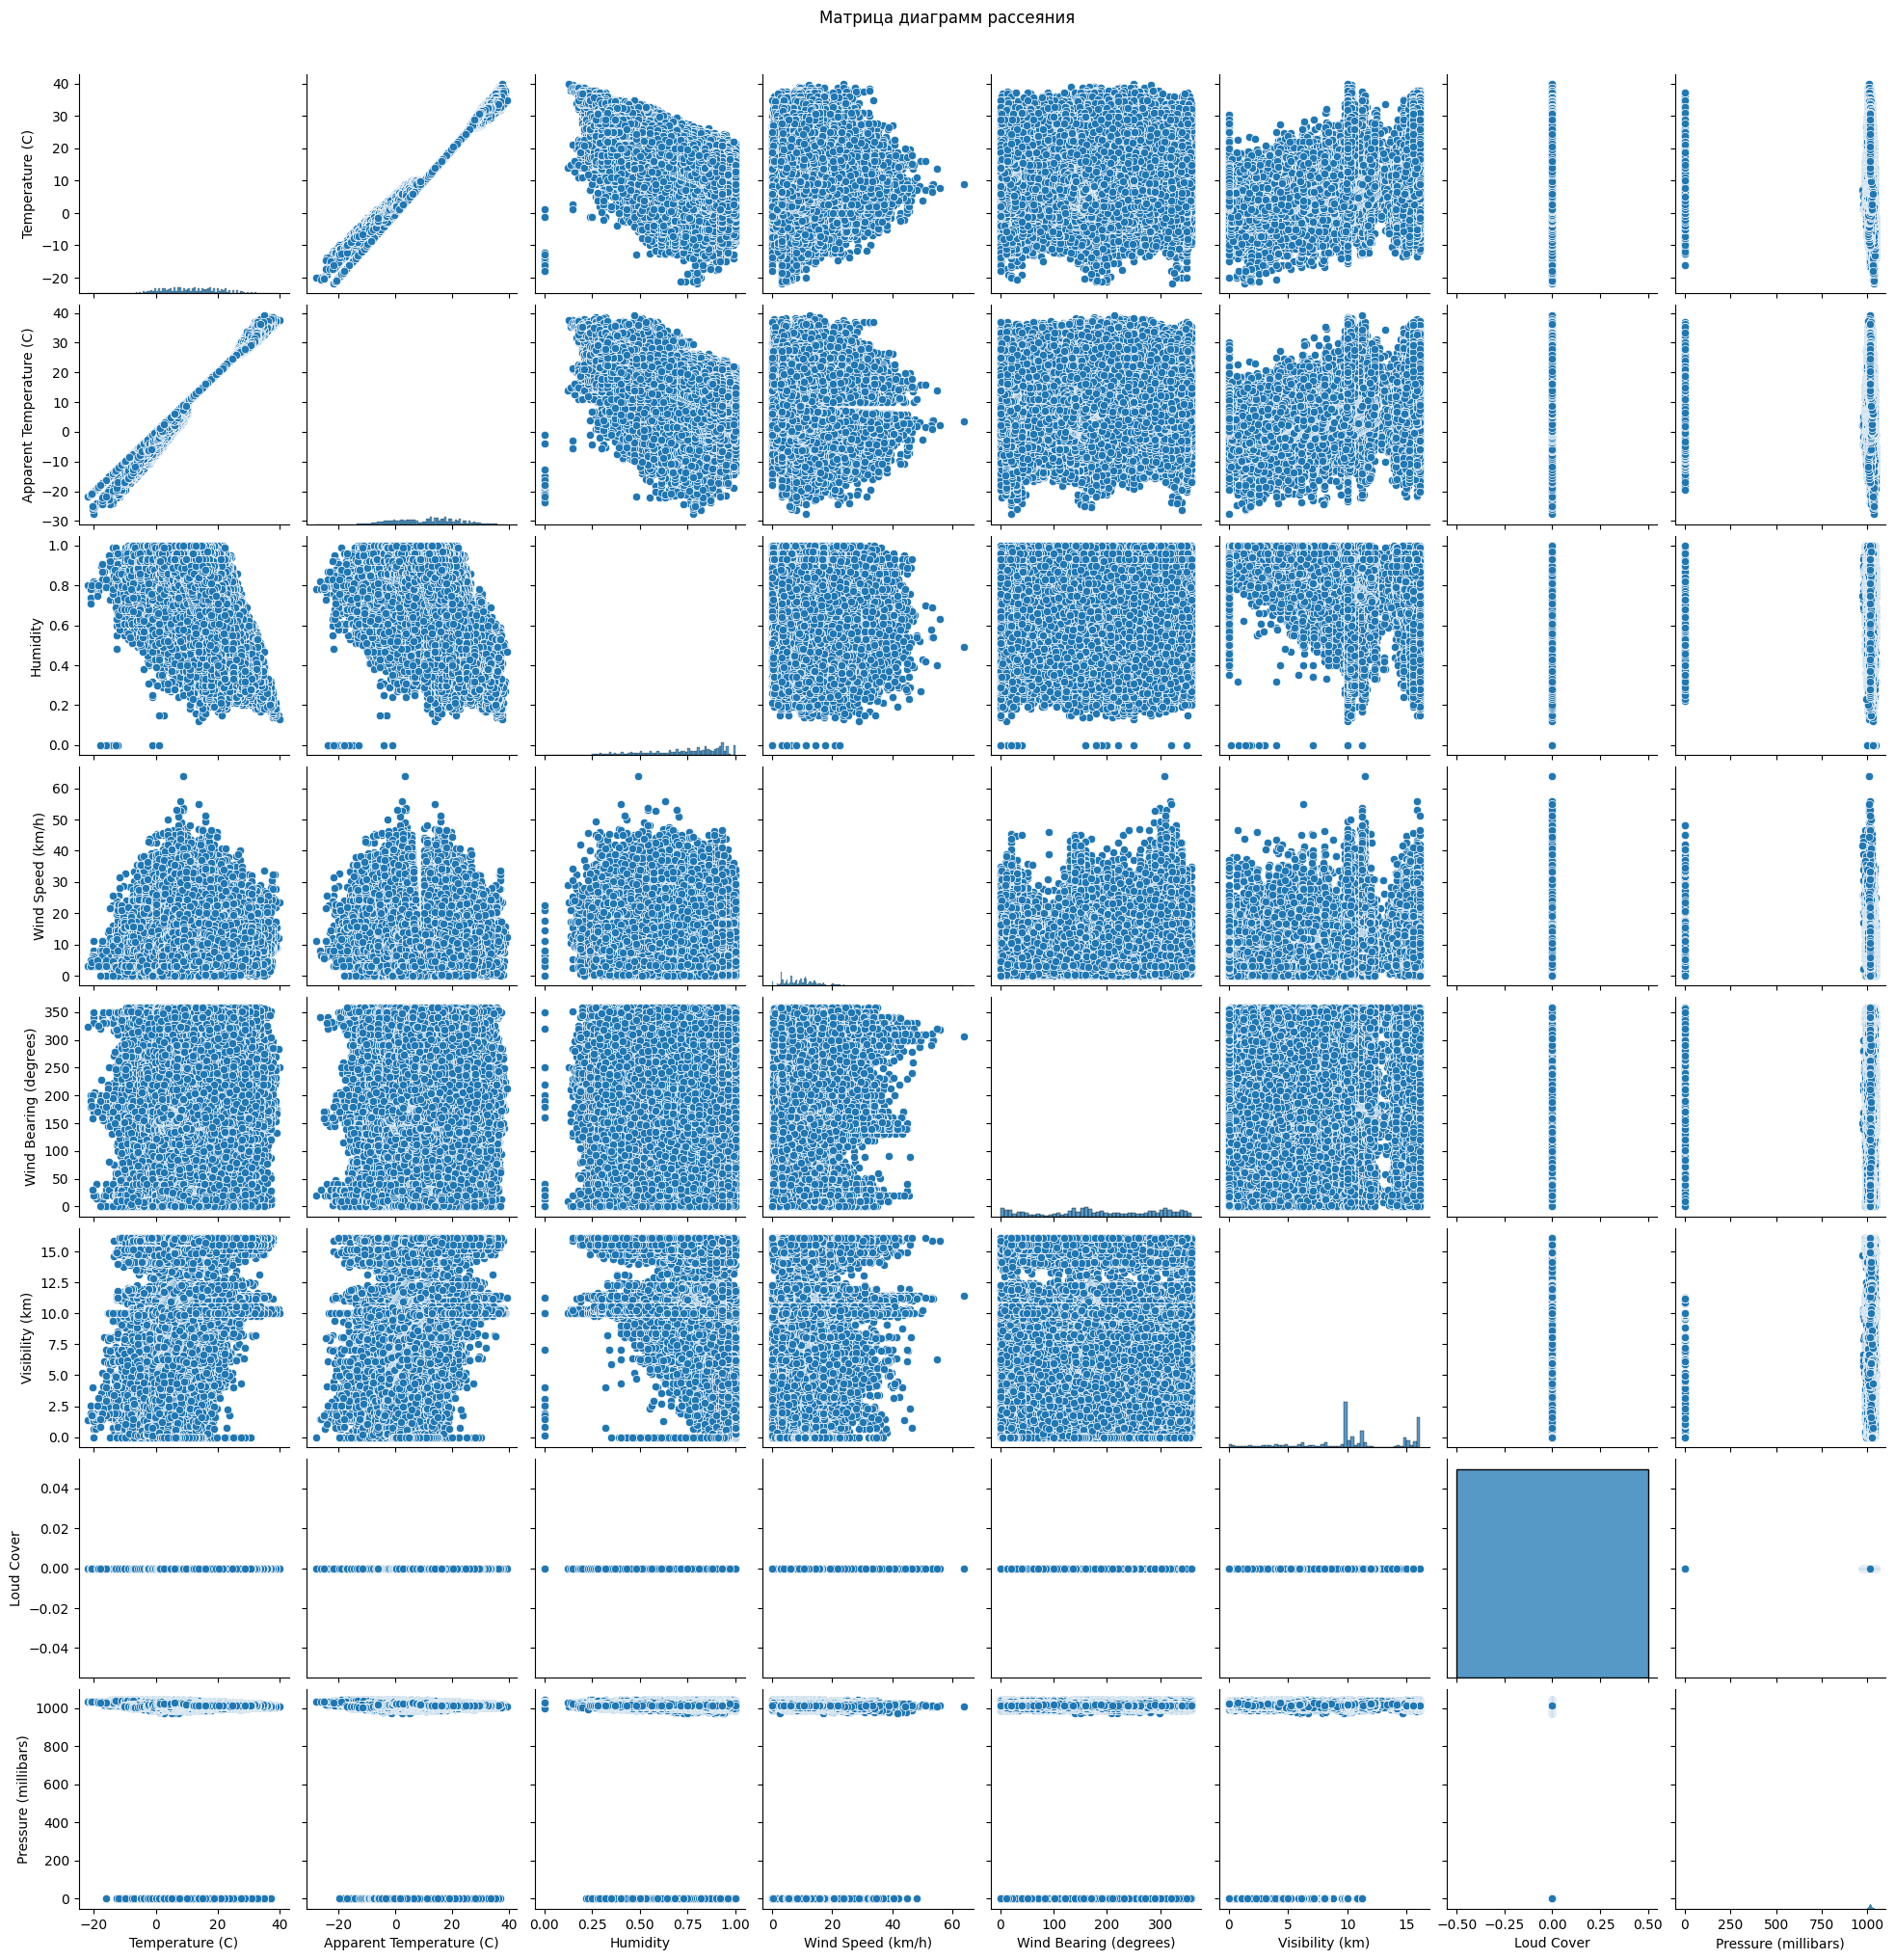

In [27]:
sns.pairplot(table[numeric_cols])
plt.suptitle('Матрица диаграмм рассеяния', y=1.02)
plt.show()

## 4. Проанализируйте коэффициенты корреляции и диаграммы рассеяния и выберите параметры для построения модели простой линейной регрессии.

In [28]:
x = table[['Temperature (C)']]
y = table['Apparent Temperature (C)']


## 5. Рассчитайте модель и визуализируйте график модели на диаграмме рассеяния параметра (который учтен в модели)


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

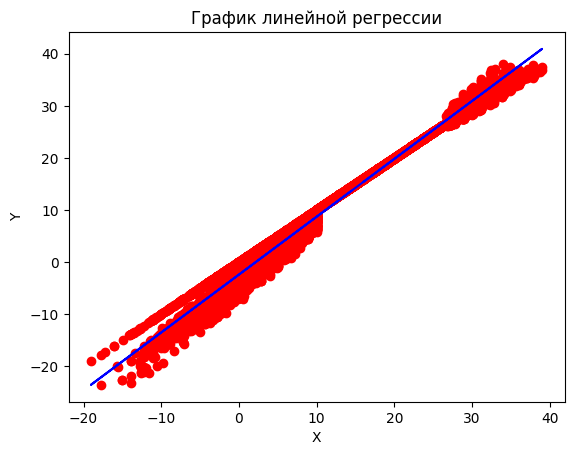

In [30]:
import matplotlib.pyplot as plt

# Обучение модели
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

# Предсказание значений для тестового набора
y_pred = lin_reg.predict(x_test)

# Визуализация результатов
plt.scatter(x_test, y_test, color='red')
plt.plot(x_test, y_pred, color='blue')
plt.title('График линейной регрессии')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


## 6. Оцените качество полученной модели.

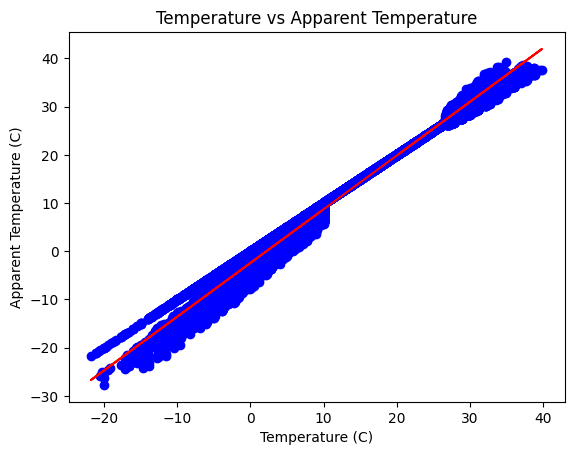

In [31]:
plt.scatter(x, y, color='blue')
plt.plot(x, lin_reg.predict(x), color='red')
plt.title('Temperature vs Apparent Temperature')
plt.xlabel('Temperature (C)')
plt.ylabel('Apparent Temperature (C)')
plt.show()

In [32]:
from sklearn import metrics

y_pred = lin_reg.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.9946153181403581
Mean Squared Error: 1.682072932608365
Root Mean Squared Error: 1.2969475442778575


## 7. Добавьте в модель линейной регрессии еще несколько параметров, в той или иной мере влияющих на целевую переменную. 8. Рассчитайте модель с несколькими параметрами и оцените качество модели.

In [35]:
x = table[['Temperature (C)', 'Humidity', 'Wind Speed (km/h)']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
lin_reg.fit(x_train, y_train)

y_pred = lin_reg.predict(x_test)



print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

r2_score = lin_reg.score(x_test, y_test)
print('R2 Score:', r2_score)


Mean Absolute Error: 0.845980553753799
Mean Squared Error: 1.1617427777818046
Root Mean Squared Error: 1.0778417220454053
R2 Score: 0.9897595663486083
